In [27]:
#Load the libraryss
import pandas as pd #To work with dataset
import numpy as np #Math library
import seaborn as sns #Graph library that use matplot in background
import matplotlib.pyplot as plt #to plot some parameters in seaborn

In [28]:
#Importing the data
df_credit = pd.read_csv("C:\\Geetha\\GitRepos\\LendingClubCaseStudy\\loan.csv",index_col=0, low_memory=False)
df_credit.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
id,,,,,,,,,,,,,,,,,,,,,
1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [29]:
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Columns: 110 entries, member_id to total_il_high_credit_limit
dtypes: float64(74), int64(12), object(24)
memory usage: 33.6+ MB


<b> Check for missing values:</b>

In [30]:
df_credit.isnull().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 110, dtype: int64

In [31]:
df_credit.dropna(axis=1, how='all',inplace=True)
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 56 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_title                   37258 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status      

Drop single value and unnecessary columns

In [32]:
df_credit.drop(['pymnt_plan','initial_list_status','policy_code','acc_now_delinq','delinq_amnt','tax_liens','addr_state','zip_code','emp_title'], axis=1,inplace=True)
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                  

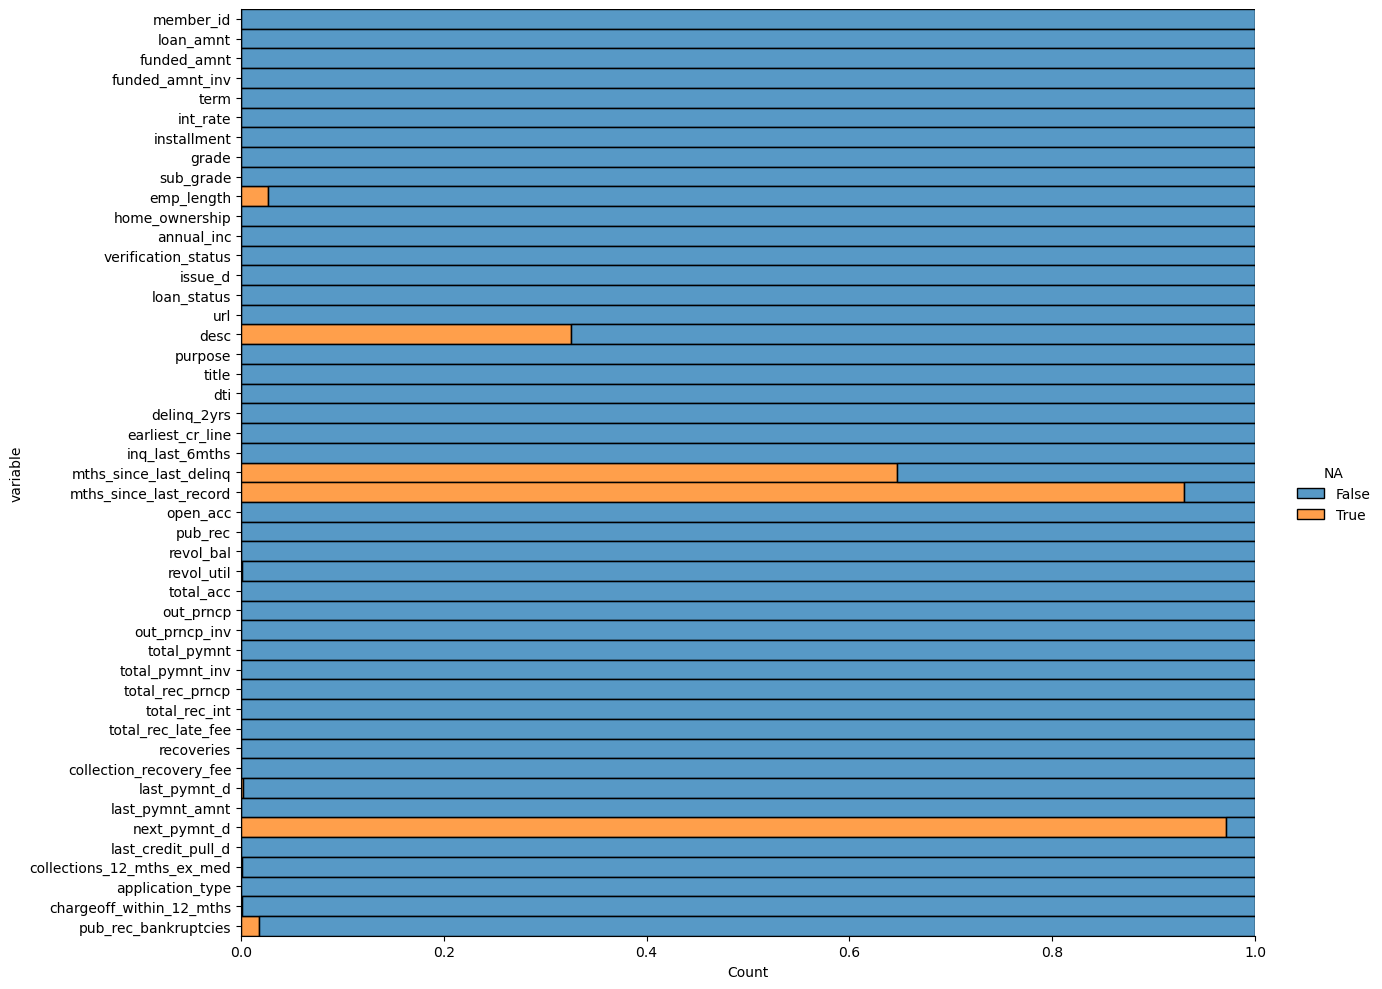

In [33]:
# Let's check missing values
sns.displot(
    data=df_credit.isna().melt(value_name="NA"),
    y="variable",
    hue="NA",
    multiple="fill",
    height=10,
    aspect=1.3
)
plt.show()

Drop coloumns where there more than 3/4th of missing values

In [34]:
df_credit.drop(['next_pymnt_d','mths_since_last_delinq','mths_since_last_record','desc'], axis=1,inplace=True)
df_credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Data columns (total 43 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_length                  38642 non-null  object 
 10  home_ownership              39717 non-null  object 
 11  annual_inc                  39717 non-null  float64
 12  verification_status         39717 non-null  object 
 13  issue_d                  

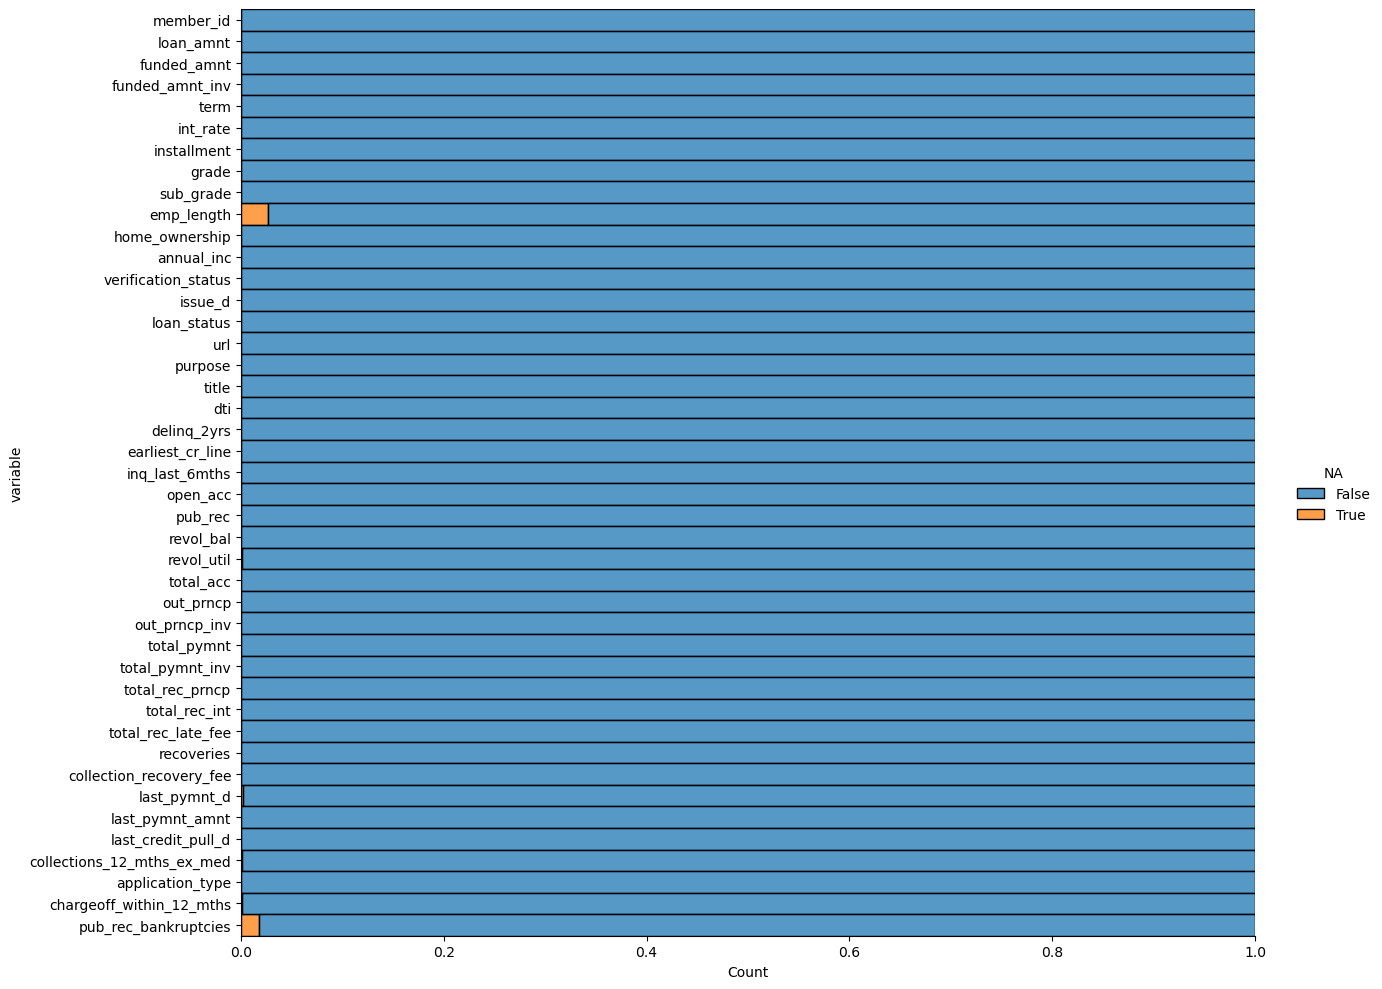

In [35]:
# Let's check missing values
sns.displot(
    data=df_credit.isna().melt(value_name="NA"),
    y="variable",
    hue="NA",
    multiple="fill",
    height=10,
    aspect=1.3
)
plt.show()

<B>Predictor variable analysis</B>

In [36]:
# Separating Categorical and Continuous Numerical Variables
categorical = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','loan_status','purpose','earliest_cr_line','open_acc']
continuous = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti']

In [37]:
df_credit[continuous].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,39717.0,11219.443815,7456.670694,500.00,5500.00,10000.00,15000.00,35000.00
installment,39717.0,324.561922,208.874874,15.69,167.02,280.22,430.78,1305.19
annual_inc,39717.0,68968.926377,63793.765790,4000.00,40404.00,59000.00,82300.00,6000000.00
dti,39717.0,13.315130,6.678594,0.00,8.17,13.40,18.60,29.99


Take out outliers on annual inc

In [38]:
df_credit_clean= df_credit[df_credit['annual_inc'] <= 3000000]
df_loan_status=df_credit_clean[df_credit_clean["loan_status"]== 'Charged Off']
#df_loan.info()
df_loan_status[continuous].describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,5627.0,12104.385108,8085.732038,900.00,5600.000,10000.00,16500.00,35000.00
installment,5627.0,336.175006,217.051841,22.79,168.555,293.87,457.84,1305.19
annual_inc,5627.0,62427.298034,47776.014188,4080.00,37000.000,53000.00,75000.00,1250000.00
dti,5627.0,14.000624,6.585577,0.00,9.050,14.29,19.29,29.85


In [39]:
for variable in categorical:
  print(df_loan_status[variable].value_counts())

 36 months    3227
 60 months    2400
Name: term, dtype: int64
B    1425
C    1347
D    1118
E     715
A     602
F     319
G     101
Name: grade, dtype: int64
B5    356
B3    341
C1    336
B4    329
C2    321
D2    271
C3    270
D3    256
B2    228
A5    217
D4    215
C4    212
D5    209
C5    208
E1    198
A4    178
B1    171
D1    167
E2    163
E4    126
E3    119
E5    109
A3    103
F1     91
A2     74
F2     70
F5     54
F4     53
F3     51
G1     31
A1     30
G2     28
G3     19
G4     13
G5     10
Name: sub_grade, dtype: int64
10+ years    1331
< 1 year      639
2 years       567
3 years       555
4 years       462
5 years       458
1 year        456
6 years       307
7 years       263
8 years       203
9 years       158
Name: emp_length, dtype: int64
RENT        2839
MORTGAGE    2327
OWN          443
OTHER         18
Name: home_ownership, dtype: int64
Not Verified       2142
Verified           2051
Source Verified    1434
Name: verification_status, dtype: int64
Charged Off    56

Below Visualization Give us Idea various loan status

In [40]:
# work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True) # this code, allow us to work with offline plotly version
import plotly.graph_objs as go # it's like "plt" of matplot
import plotly.subplots as tls # It's useful to we get some tools of plotly
import warnings # This library will be used to ignore some warnings
from collections import Counter # To do counter of some features

In [41]:
tr0 = go.Bar(
            x = df_credit_clean[df_credit_clean["loan_status"]== 'Fully Paid']["loan_status"].value_counts().index.values,
            y = df_credit_clean[df_credit_clean["loan_status"]== 'Fully Paid']["loan_status"].value_counts().values,
            name='Fully Paid'
    )

tr1 = go.Bar(
            x = df_credit_clean[df_credit_clean["loan_status"]== 'Charged Off']["loan_status"].value_counts().index.values,
            y = df_credit_clean[df_credit_clean["loan_status"]== 'Charged Off']["loan_status"].value_counts().values,
            name='Charged Off'
    )

tr2 = go.Bar(
            x = df_credit_clean[df_credit_clean["loan_status"]== 'Current']["loan_status"].value_counts().index.values,
            y = df_credit_clean[df_credit_clean["loan_status"]== 'Current']["loan_status"].value_counts().values,
            name='Current'
    )

data = [tr0, tr1,tr2]

layout = go.Layout(
    
)

layout = go.Layout(
    yaxis=dict(
        title='Count'
    ),
    xaxis=dict(
        title='Loan Status '
    ),
    title='Loan Status distribution'
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='grouped-bar')